# CIFAR 10
## Junaid Hossain
### 222008812
https://colab.research.google.com/drive/1BRVxc426AuOC0jNknLkO8AhS40Z2MjS3?usp=sharing

In [1]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
                                                                          # or cifar100
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


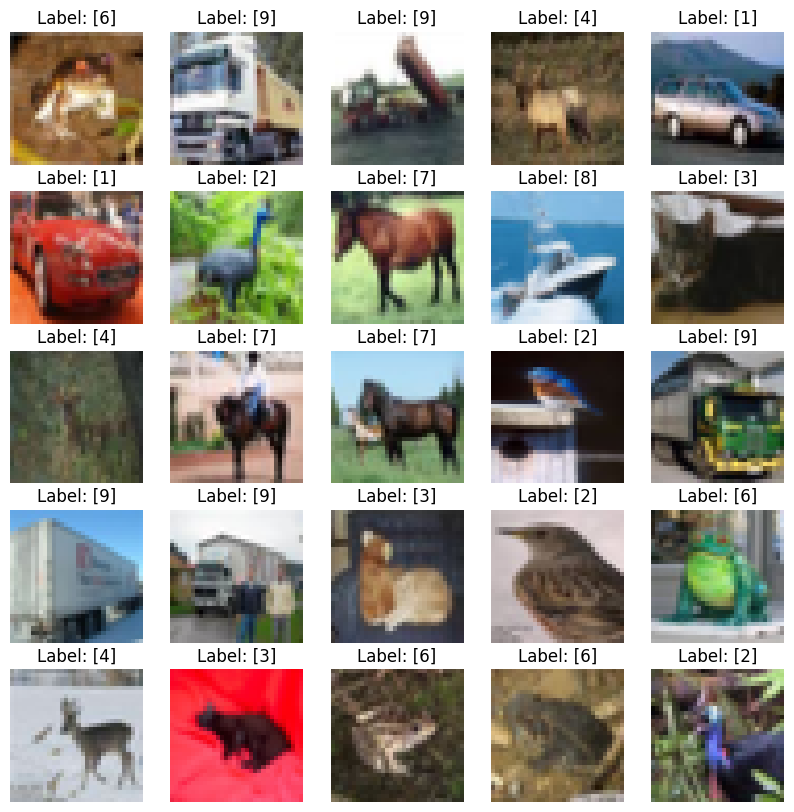

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
for i in range(25):
    random_index = np.random.randint(0, train_images.shape[0])
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [3]:
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{np.uint8(0): np.int64(5000),
 np.uint8(1): np.int64(5000),
 np.uint8(2): np.int64(5000),
 np.uint8(3): np.int64(5000),
 np.uint8(4): np.int64(5000),
 np.uint8(5): np.int64(5000),
 np.uint8(6): np.int64(5000),
 np.uint8(7): np.int64(5000),
 np.uint8(8): np.int64(5000),
 np.uint8(9): np.int64(5000)}

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend as K

num_labels = len(np.unique(train_labels))
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
num_labels

10

In [7]:
# taking input size
image_size = train_images.shape[1]
input_size = image_size*image_size*3

batch_size = 64

print("Image size:", image_size)
print("Input size:", input_size)

Image size: 32
Input size: 3072


In [8]:
# resizing and normalisation
x_train = np.reshape(train_images,[-1,input_size])
x_train = x_train.astype('float32')/255
x_test = np.reshape(test_images,[-1,input_size])
x_test = x_test.astype('float32')/255

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 3072), (10000, 3072), (50000, 10), (10000, 10))

## Scratch model

In [7]:
model = Sequential()
model.add(Dense(512, input_dim=input_size,activation='relu'))
Dropout(.25)
model.add(Dense(256,activation='relu'))
Dropout(.25)
model.add(Dense(128,activation='relu'))
Dropout(.25)
model.add(Dense(64,activation='relu'))
Dropout(.25)
model.add(Dense(num_labels,activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,746,506 (6.66 MB)

 Trainable params: 1,746,506 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=50,batch_size=batch_size)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.2540 - loss: 2.0340
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.3822 - loss: 1.7236
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4201 - loss: 1.6185
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.4405 - loss: 1.5549
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4626 - loss: 1.5040
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4732 - loss: 1.4657
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4859 - loss: 1.4342
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.4942 - loss: 1.4106
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5039 - loss: 1.3920
Epoch 10/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5156 - loss: 1.3528
Epoch 11/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.5268 - loss: 1.3266
Epoch 12/50
782/782 ━━━━━━━━━━

In [10]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5010 - loss: 1.8340
Test loss: 1.8412137031555176
Test accuracy: 0.49779999256134033


In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.63      0.51      0.56      1000
           1       0.63      0.60      0.61      1000
           2       0.38      0.41      0.39      1000
           3       0.33      0.43      0.37      1000
           4       0.43      0.46      0.44      1000
           5       0.41      0.35      0.38      1000
           6       0.55      0.49      0.52      1000
           7       0.54      0.60      0.57      1000
           8       0.66      0.56      0.61      1000
           9       0.53      0.58      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



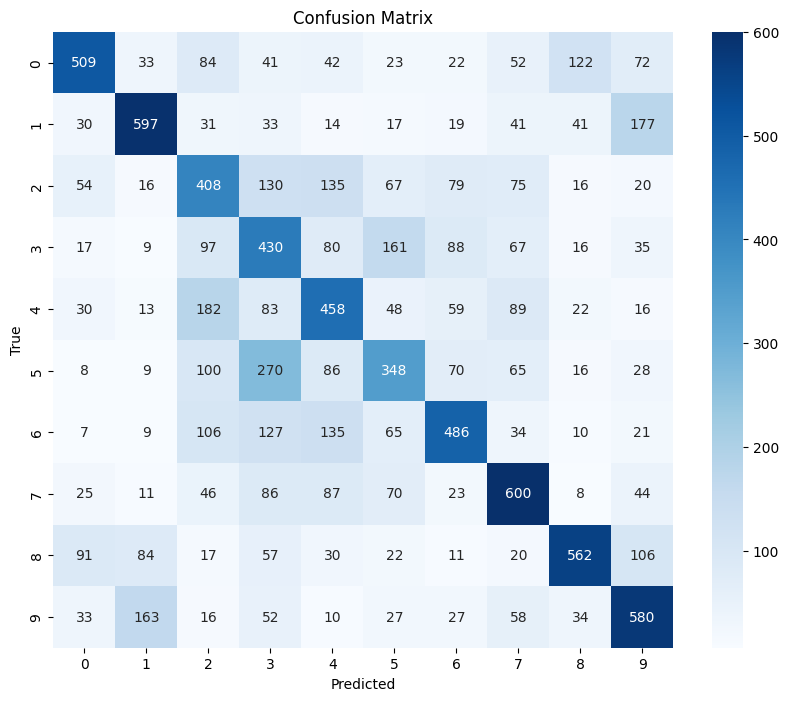

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

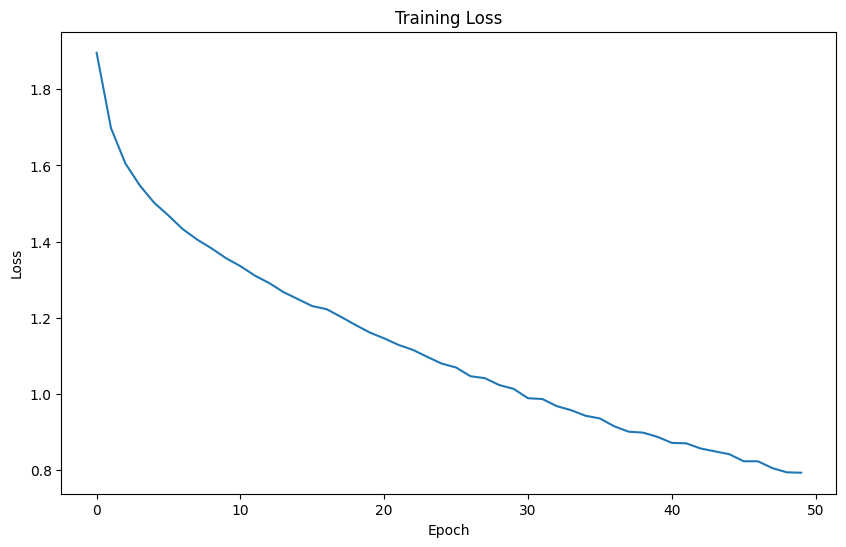

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Using pre-trained models

In [9]:
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3

# resnet50 base model with pre-trained ImageNet weights
base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [10]:
from tensorflow.keras.applications.resnet50 import preprocess_input

x_train_processed = preprocess_input(train_images)
x_test_processed = preprocess_input(test_images)

print("Preprocessed training images shape:", x_train_processed.shape)
print("Preprocessed testing images shape:", x_test_processed.shape)

Preprocessed training images shape: (50000, 32, 32, 3)
Preprocessed testing images shape: (10000, 32, 32, 3)


In [11]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Freeze the layers of the ResNet50 base model
for layer in base.layers:
    layer.trainable = False

model = Sequential()
model.add(base)
model.add(Flatten())
Dropout(.25)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
Dropout(.25)
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
Dropout(.25)
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
Dropout(.25)
model.add(Dense(num_labels, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,344,586 (100.50 MB)

 Trainable params: 2,756,874 (10.52 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
history = model.fit(x_train_processed, y_train, epochs=50, batch_size=64)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7874 - loss: 0.8254
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7853 - loss: 0.8250
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7933 - loss: 0.8125
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7979 - loss: 0.8056
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7970 - loss: 0.8093
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8001 - loss: 0.7995
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8022 - loss: 0.7976
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8020 - loss: 0.8011
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8082 - loss: 0.7902
Epoch 10/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8123 - loss: 0.7826
Epoch 11/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8074 - loss: 0.7835
Epoch 12/50
782/782 ━━━━━━━━━━━━━━━━━━━

In [13]:
loss,accuracy = model.evaluate(x_test_processed,y_test, batch_size=batch_size)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6533 - loss: 1.2449
Test loss: 1.2385048866271973
Test accuracy: 0.6585000157356262


In [16]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_processed)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      1000
           1       0.62      0.81      0.71      1000
           2       0.59      0.60      0.59      1000
           3       0.50      0.49      0.50      1000
           4       0.60      0.61      0.61      1000
           5       0.58      0.57      0.57      1000
           6       0.72      0.71      0.71      1000
           7       0.69      0.66      0.68      1000
           8       0.72      0.77      0.74      1000
           9       0.76      0.64      0.69      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



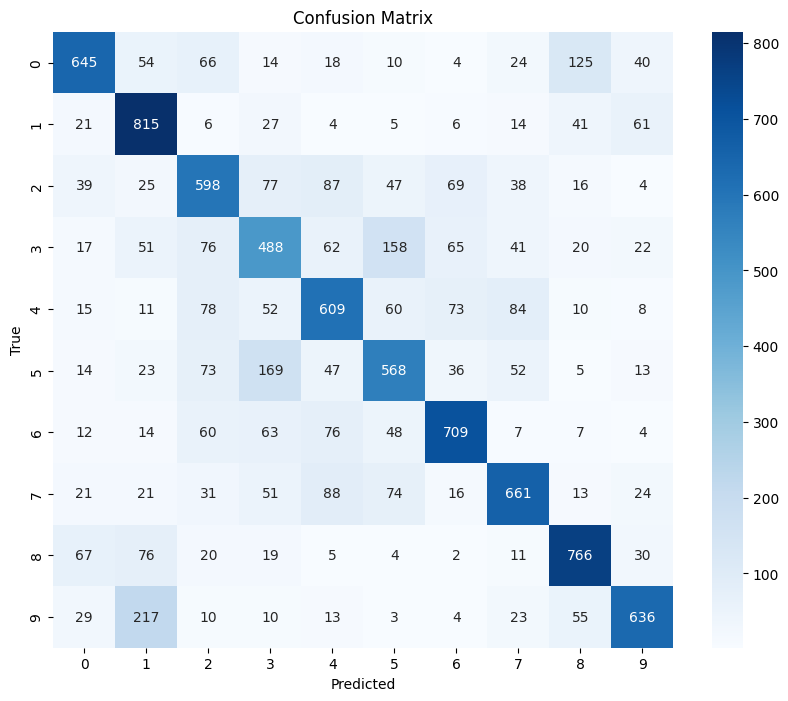

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

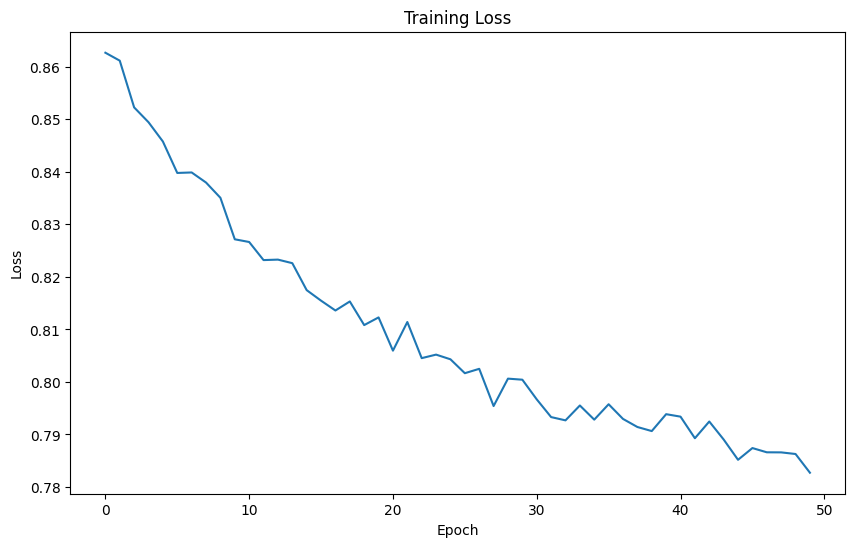

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()